In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("Training_Dataset_Time_Deposit - Sheet1.csv")

In [3]:
df.head()

,key,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,444,45,management,married,university.degree,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,445,34,admin.,married,basic.9y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,446,47,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,447,42,technician,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,448,57,technician,married,basic.4y,unknown,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
target=df['y']

In [5]:
target.head()

0     no
1     no
2     no
3    yes
4     no
Name: y, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             4170 non-null   int64  
 1   age             4170 non-null   int64  
 2   job             4170 non-null   object 
 3   marital         4170 non-null   object 
 4   education       4170 non-null   object 
 5   default         4170 non-null   object 
 6   housing         4170 non-null   object 
 7   loan            4170 non-null   object 
 8   contact         4170 non-null   object 
 9   month           4170 non-null   object 
 10  day_of_week     4170 non-null   object 
 11  duration        4170 non-null   int64  
 12  campaign        4170 non-null   int64  
 13  pdays           4170 non-null   int64  
 14  previous        4170 non-null   int64  
 15  poutcome        4170 non-null   object 
 16  emp.var.rate    4170 non-null   float64
 17  cons.price.idx  4170 non-null   f

In [7]:
df.job.value_counts()


blue-collar      1059
admin.            962
technician        701
services          411
management        328
entrepreneur      178
self-employed     142
housemaid         112
retired           111
unemployed         95
unknown            37
student            34
Name: job, dtype: int64

In [8]:
df=df.drop('key',axis=1)

In [9]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,45,management,married,university.degree,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,34,admin.,married,basic.9y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,47,blue-collar,married,unknown,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,42,technician,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,57,technician,married,basic.4y,unknown,no,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,40,blue-collar,married,basic.9y,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
4166,37,admin.,married,university.degree,no,no,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
4167,32,technician,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
4168,38,entrepreneur,married,high.school,no,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [10]:
df.education.value_counts()

university.degree      1129
high.school             930
basic.9y                671
professional.course     531
basic.4y                489
basic.6y                247
unknown                 173
Name: education, dtype: int64

In [11]:
#df=df.drop('y',axis=1)

In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,45,management,married,university.degree,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,34,admin.,married,basic.9y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,47,blue-collar,married,unknown,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,42,technician,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,57,technician,married,basic.4y,unknown,no,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,40,blue-collar,married,basic.9y,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
4166,37,admin.,married,university.degree,no,no,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
4167,32,technician,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
4168,38,entrepreneur,married,high.school,no,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [13]:
df = pd.get_dummies(df, columns = ['job', 'education'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4170 non-null   int64  
 1   marital                        4170 non-null   object 
 2   default                        4170 non-null   object 
 3   housing                        4170 non-null   object 
 4   loan                           4170 non-null   object 
 5   contact                        4170 non-null   object 
 6   month                          4170 non-null   object 
 7   day_of_week                    4170 non-null   object 
 8   duration                       4170 non-null   int64  
 9   campaign                       4170 non-null   int64  
 10  pdays                          4170 non-null   int64  
 11  previous                       4170 non-null   int64  
 12  poutcome                       4170 non-null   o

In [14]:
#df.append(one_hot_encoded_data,ignore_index=True)

In [15]:
#df=df.drop(['job','education'],axis=1)

In [16]:
df.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown
0,45,married,no,yes,no,telephone,may,tue,140,1,...,0,0,0,0,0,0,0,0,1,0
1,34,married,no,no,no,telephone,may,tue,175,1,...,0,0,0,0,0,1,0,0,0,0
2,47,married,unknown,no,no,telephone,may,tue,136,1,...,0,0,0,0,0,0,0,0,0,1
3,42,married,no,no,no,telephone,may,tue,1623,1,...,1,0,0,0,0,0,0,1,0,0
4,57,married,unknown,no,yes,telephone,may,tue,50,1,...,1,0,0,1,0,0,0,0,0,0


In [17]:
df.marital.value_counts()

married     2786
single       906
divorced     465
unknown       13
Name: marital, dtype: int64

In [18]:
df.housing.value_counts()

no         2067
yes        1969
unknown     134
Name: housing, dtype: int64

In [19]:
for i in list(df.columns):
    df=df[df[i]!='unknown']

In [20]:
df.head()


,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown
0,45,married,no,yes,no,telephone,may,tue,140,1,...,0,0,0,0,0,0,0,0,1,0
1,34,married,no,no,no,telephone,may,tue,175,1,...,0,0,0,0,0,1,0,0,0,0
3,42,married,no,no,no,telephone,may,tue,1623,1,...,1,0,0,0,0,0,0,1,0,0
6,38,married,no,no,yes,telephone,may,tue,144,1,...,0,0,0,1,0,0,0,0,0,0
9,60,married,no,no,no,telephone,may,tue,451,2,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df.default.value_counts()

no    2840
Name: default, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 4169
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            2840 non-null   int64  
 1   marital                        2840 non-null   object 
 2   default                        2840 non-null   object 
 3   housing                        2840 non-null   object 
 4   loan                           2840 non-null   object 
 5   contact                        2840 non-null   object 
 6   month                          2840 non-null   object 
 7   day_of_week                    2840 non-null   object 
 8   duration                       2840 non-null   int64  
 9   campaign                       2840 non-null   int64  
 10  pdays                          2840 non-null   int64  
 11  previous                       2840 non-null   int64  
 12  poutcome                       2840 non-null   o

In [23]:
df.marital.value_counts()

married     1799
single       694
divorced     347
Name: marital, dtype: int64

In [24]:
df.month.value_counts()

jun    1451
may     679
aug     504
nov     206
Name: month, dtype: int64

In [25]:
df = pd.get_dummies(df, columns = ['marital', 'month'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 4169
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            2840 non-null   int64  
 1   default                        2840 non-null   object 
 2   housing                        2840 non-null   object 
 3   loan                           2840 non-null   object 
 4   contact                        2840 non-null   object 
 5   day_of_week                    2840 non-null   object 
 6   duration                       2840 non-null   int64  
 7   campaign                       2840 non-null   int64  
 8   pdays                          2840 non-null   int64  
 9   previous                       2840 non-null   int64  
 10  poutcome                       2840 non-null   object 
 11  emp.var.rate                   2840 non-null   float64
 12  cons.price.idx                 2840 non-null   f

In [26]:
for i in list(df.columns):
    print(df[i].value_counts())

31    161
32    157
36    151
33    143
34    138
35    133
39    117
38    107
37    102
40    101
30    100
41     90
29     90
42     89
45     81
52     77
28     76
46     74
43     74
44     67
47     66
50     62
48     60
49     54
53     50
54     48
56     42
26     40
25     40
51     39
57     37
58     36
55     36
27     35
24     23
59     19
60     10
23      6
22      5
21      3
20      1
Name: age, dtype: int64
no    2840
Name: default, dtype: int64
no     1463
yes    1377
Name: housing, dtype: int64
no     2449
yes     391
Name: loan, dtype: int64
telephone    2162
cellular      678
Name: contact, dtype: int64
mon    731
fri    635
tue    573
wed    503
thu    398
Name: day_of_week, dtype: int64
138     19
109     18
112     16
136     16
134     16
        ..
1128     1
1134     1
1148     1
1162     1
1882     1
Name: duration, Length: 708, dtype: int64
1     1129
2      665
3      412
4      198
5      105
6       70
7       48
8       38
10      29
9       23
12

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['default']= label_encoder.fit_transform(df['default'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['housing']= label_encoder.fit_transform(df['housing'])



In [28]:
df=df.drop('poutcome',axis=1)

In [29]:
df.head()

,age,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,...,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,month_aug,month_jun,month_may,month_nov
0,45,0,1,0,1,tue,140,1,999,0,...,0,1,0,0,1,0,0,0,1,0
1,34,0,0,0,1,tue,175,1,999,0,...,0,0,0,0,1,0,0,0,1,0
3,42,0,0,0,1,tue,1623,1,999,0,...,1,0,0,0,1,0,0,0,1,0
6,38,0,0,1,1,tue,144,1,999,0,...,0,0,0,0,1,0,0,0,1,0
9,60,0,0,0,1,tue,451,2,999,0,...,0,1,0,0,1,0,0,0,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 4169
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            2840 non-null   int64  
 1   default                        2840 non-null   int32  
 2   housing                        2840 non-null   int32  
 3   loan                           2840 non-null   int32  
 4   contact                        2840 non-null   int32  
 5   day_of_week                    2840 non-null   object 
 6   duration                       2840 non-null   int64  
 7   campaign                       2840 non-null   int64  
 8   pdays                          2840 non-null   int64  
 9   previous                       2840 non-null   int64  
 10  emp.var.rate                   2840 non-null   float64
 11  cons.price.idx                 2840 non-null   float64
 12  cons.conf.idx                  2840 non-null   f

In [31]:
df=df.drop('day_of_week',axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 4169
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            2840 non-null   int64  
 1   default                        2840 non-null   int32  
 2   housing                        2840 non-null   int32  
 3   loan                           2840 non-null   int32  
 4   contact                        2840 non-null   int32  
 5   duration                       2840 non-null   int64  
 6   campaign                       2840 non-null   int64  
 7   pdays                          2840 non-null   int64  
 8   previous                       2840 non-null   int64  
 9   emp.var.rate                   2840 non-null   float64
 10  cons.price.idx                 2840 non-null   float64
 11  cons.conf.idx                  2840 non-null   float64
 12  euribor3m                      2840 non-null   f

In [33]:
df.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,month_aug,month_jun,month_may,month_nov
0,45,0,1,0,1,140,1,999,0,1.1,...,0,1,0,0,1,0,0,0,1,0
1,34,0,0,0,1,175,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
3,42,0,0,0,1,1623,1,999,0,1.1,...,1,0,0,0,1,0,0,0,1,0
6,38,0,0,1,1,144,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
9,60,0,0,0,1,451,2,999,0,1.1,...,0,1,0,0,1,0,0,0,1,0


In [34]:
df['y']= label_encoder.fit_transform(df['y'])

In [35]:
df.head(20)

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,month_aug,month_jun,month_may,month_nov
0,45,0,1,0,1,140,1,999,0,1.1,...,0,1,0,0,1,0,0,0,1,0
1,34,0,0,0,1,175,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
3,42,0,0,0,1,1623,1,999,0,1.1,...,1,0,0,0,1,0,0,0,1,0
6,38,0,0,1,1,144,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
9,60,0,0,0,1,451,2,999,0,1.1,...,0,1,0,0,1,0,0,0,1,0
10,48,0,1,0,1,159,1,999,0,1.1,...,0,1,0,0,1,0,0,0,1,0
11,47,0,1,0,1,170,1,999,0,1.1,...,1,0,0,0,1,0,0,0,1,0
12,40,0,0,0,1,243,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
14,48,0,1,0,1,112,1,999,0,1.1,...,0,0,0,0,0,1,0,0,1,0
15,54,0,0,0,1,262,2,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0


In [36]:
df.default.value_counts()

0    2840
Name: default, dtype: int64

<AxesSubplot:>

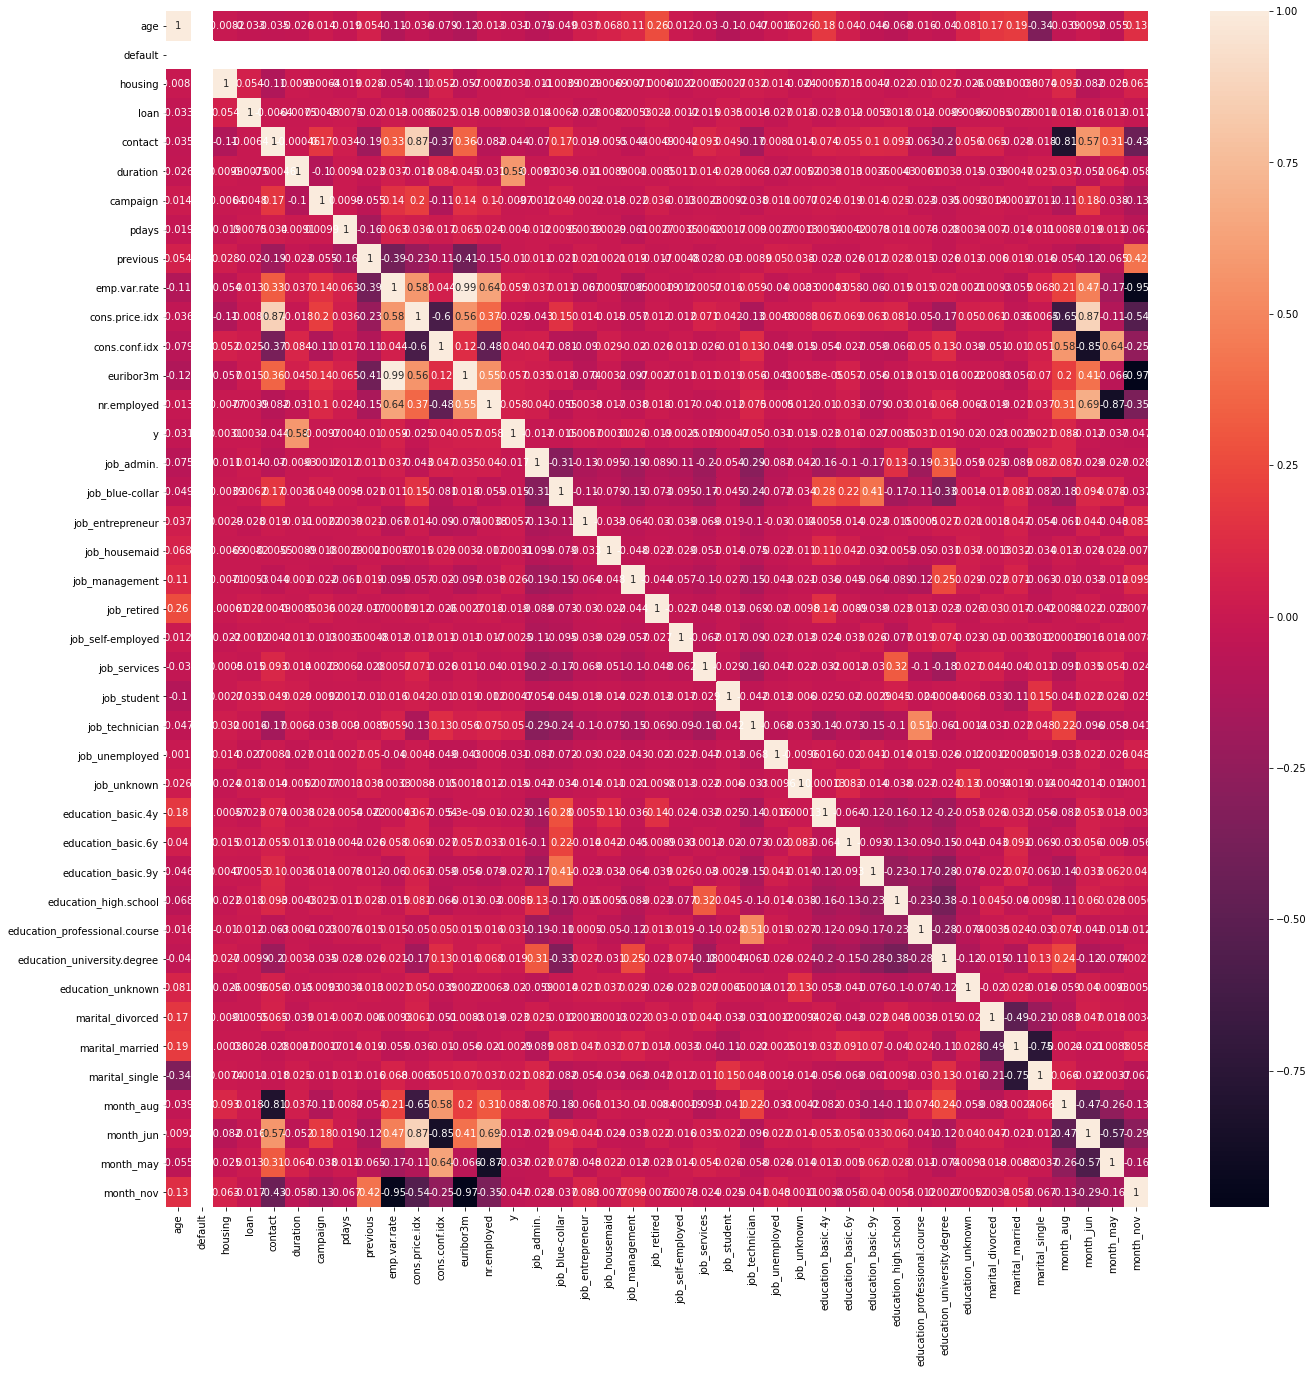

In [37]:
import seaborn as sns
corr_m=df.corr()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22,22))        
sns.heatmap(corr_m, annot=True, ax=ax)

In [38]:
s=corr_m['y'].sort_values(ascending=False)
print(s)

y                                1.000000
duration                         0.576847
month_aug                        0.087903
emp.var.rate                     0.058954
nr.employed                      0.058264
euribor3m                        0.056688
job_technician                   0.049722
cons.conf.idx                    0.040012
education_professional.course    0.030742
job_management                   0.025793
marital_single                   0.020733
education_university.degree      0.019142
education_basic.6y               0.016158
job_entrepreneur                 0.005747
pdays                            0.004044
loan                             0.003240
housing                          0.003106
job_student                      0.000467
job_housemaid                    0.000309
job_self-employed               -0.002452
marital_married                 -0.002892
education_high.school           -0.008518
campaign                        -0.009749
previous                        -0

In [39]:
df=df.drop('default',axis=1)

In [40]:
df.head()

,age,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,month_aug,month_jun,month_may,month_nov
0,45,1,0,1,140,1,999,0,1.1,93.994,...,0,1,0,0,1,0,0,0,1,0
1,34,0,0,1,175,1,999,0,1.1,93.994,...,0,0,0,0,1,0,0,0,1,0
3,42,0,0,1,1623,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
6,38,0,1,1,144,1,999,0,1.1,93.994,...,0,0,0,0,1,0,0,0,1,0
9,60,0,0,1,451,2,999,0,1.1,93.994,...,0,1,0,0,1,0,0,0,1,0


In [41]:
target=df['y']

In [42]:
df=df.drop('y',axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 4169
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            2840 non-null   int64  
 1   housing                        2840 non-null   int32  
 2   loan                           2840 non-null   int32  
 3   contact                        2840 non-null   int32  
 4   duration                       2840 non-null   int64  
 5   campaign                       2840 non-null   int64  
 6   pdays                          2840 non-null   int64  
 7   previous                       2840 non-null   int64  
 8   emp.var.rate                   2840 non-null   float64
 9   cons.price.idx                 2840 non-null   float64
 10  cons.conf.idx                  2840 non-null   float64
 11  euribor3m                      2840 non-null   float64
 12  nr.employed                    2840 non-null   f

In [44]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [20,5,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
#     'naive_bayes_multinomial': {
#         'model': MultinomialNB(),
#         'params': {}
#     },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [45]:
scores=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(df,target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.965141,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.957042,{'n_estimators': 30}
2,logistic_regression,0.962676,{'C': 5}
3,naive_bayes_gaussian,0.373239,{}
4,decision_tree,0.940493,{'criterion': 'entropy'}


In [46]:
test=pd.read_csv("Testing_Dataset_Time_Deposit - Sheet1 (1).csv")


In [47]:
test.head()

,key,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [48]:
for i in list(test.columns):
    if i!='job':
        test=test[test[i]!='unknown']

In [49]:
test=test.drop(['key','default','poutcome','day_of_week'],axis=1)

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27856 entries, 0 to 37017
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             27856 non-null  int64  
 1   job             27856 non-null  object 
 2   marital         27856 non-null  object 
 3   education       27856 non-null  object 
 4   housing         27856 non-null  object 
 5   loan            27856 non-null  object 
 6   contact         27856 non-null  object 
 7   month           27856 non-null  object 
 8   duration        27856 non-null  int64  
 9   campaign        27856 non-null  int64  
 10  pdays           27856 non-null  int64  
 11  previous        27856 non-null  int64  
 12  emp.var.rate    27856 non-null  float64
 13  cons.price.idx  27856 non-null  float64
 14  cons.conf.idx   27856 non-null  float64
 15  euribor3m       27856 non-null  float64
 16  nr.employed     27856 non-null  float64
dtypes: float64(5), int64(5), object

In [51]:

test['loan']= label_encoder.fit_transform(test['loan'])
test['contact']= label_encoder.fit_transform(test['contact'])
test['housing']= label_encoder.fit_transform(test['housing'])
test = pd.get_dummies(test, columns = ['marital', 'month','job','education'])

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27856 entries, 0 to 37017
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            27856 non-null  int64  
 1   housing                        27856 non-null  int32  
 2   loan                           27856 non-null  int32  
 3   contact                        27856 non-null  int32  
 4   duration                       27856 non-null  int64  
 5   campaign                       27856 non-null  int64  
 6   pdays                          27856 non-null  int64  
 7   previous                       27856 non-null  int64  
 8   emp.var.rate                   27856 non-null  float64
 9   cons.price.idx                 27856 non-null  float64
 10  cons.conf.idx                  27856 non-null  float64
 11  euribor3m                      27856 non-null  float64
 12  nr.employed                    27856 non-null 

In [53]:
test=test.drop(['month_apr','month_dec','month_jul','month_mar','month_oct','month_sep'],axis=1)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27856 entries, 0 to 37017
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            27856 non-null  int64  
 1   housing                        27856 non-null  int32  
 2   loan                           27856 non-null  int32  
 3   contact                        27856 non-null  int32  
 4   duration                       27856 non-null  int64  
 5   campaign                       27856 non-null  int64  
 6   pdays                          27856 non-null  int64  
 7   previous                       27856 non-null  int64  
 8   emp.var.rate                   27856 non-null  float64
 9   cons.price.idx                 27856 non-null  float64
 10  cons.conf.idx                  27856 non-null  float64
 11  euribor3m                      27856 non-null  float64
 12  nr.employed                    27856 non-null 

In [146]:
C=5
model=LogisticRegression(solver='liblinear',multi_class='auto',C=C,penalty='l2')

In [147]:
model.fit(df,target)

LogisticRegression(C=5, solver='liblinear')

In [148]:
answer=pd.DataFrame(model.predict(test))

In [149]:
answer.head()

,0
0,0
1,0
2,0
3,0
4,0


In [150]:
answer.value_counts()

0    27366
1      490
dtype: int64

In [151]:
answer['key']=np.arange(1,27857,1)

In [152]:
answer.head()

,0,key
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [153]:
answer.head()

,0,key
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [156]:
type(df)

pandas.core.frame.DataFrame

In [159]:
answer.columns

Index([0, 'key'], dtype='object')

In [161]:
answer=answer.rename(columns={0:'y'})

In [162]:
answer.head()

,y,key
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [166]:
answer.to_csv("Submission_Heril_Changwal.csv",index=False)